In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import numpy as np

def load_and_prepare_data(filepath: str) -> pd.DataFrame:
    """Load the compressed GPQA data and prepare it for analysis"""
    df = pd.read_csv(filepath)
    return df

def plot_compression_distributions(df: pd.DataFrame) -> None:
    """Plot distributions of actual compression ratios for each target level"""
    compression_levels = [90, 80, 70, 60, 50]
    plt.figure(figsize=(15, 6))
    
    for level in compression_levels:
        col = f'compression_{level}_word_percent'
        sns.kdeplot(data=df[col], label=f'Target {level}%')
    
    plt.axvline(x=90, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=80, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=70, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=60, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=50, color='gray', linestyle='--', alpha=0.3)
    
    plt.title('Distribution of Actual Compression Ratios')
    plt.xlabel('Actual Compression Percentage')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

def compression_accuracy_stats(df: pd.DataFrame) -> pd.DataFrame:
    """Calculate statistics about how close compressions are to their targets"""
    stats = []
    compression_levels = [90, 80, 70, 60, 50]
    
    for level in compression_levels:
        col = f'compression_{level}_word_percent'
        error = abs(df[col] - level)
        
        stats.append({
            'Target': level,
            'Mean Actual %': df[col].mean(),
            'Std Dev': df[col].std(),
            'Mean Abs Error': error.mean(),
            'Max Error': error.max(),
            'Within 5%': (error <= 5).mean() * 100,
            'Within 10%': (error <= 10).mean() * 100
        })
    
    return pd.DataFrame(stats)

def plot_length_correlations(df: pd.DataFrame) -> None:
    """Plot how original length affects compression accuracy"""
    compression_levels = [90, 80, 70, 60, 50]
    plt.figure(figsize=(15, 10))
    
    for i, level in enumerate(compression_levels, 1):
        plt.subplot(2, 3, i)
        col = f'compression_{level}_word_percent'
        plt.scatter(df['original_word_count'], df[col], alpha=0.5)
        plt.axhline(y=level, color='r', linestyle='--')
        plt.title(f'Target {level}% Compression')
        plt.xlabel('Original Word Count')
        plt.ylabel('Actual Compression %')
    
    plt.tight_layout()
    plt.show()

def sample_compressions(df: pd.DataFrame, n: int = 5) -> pd.DataFrame:
    """Show n random examples of compressions at all levels"""
    samples = df.sample(n)
    
    results = []
    for _, row in samples.iterrows():
        example = {
            'Original': row['Question'],
            'Original Words': row['original_word_count']
        }
        
        for level in [90, 80, 70, 60, 50]:
            compressed = row[f'compression_{level}']
            words = row[f'compression_{level}_word_count']
            actual_percent = row[f'compression_{level}_word_percent']
            example[f'{level}% Compression'] = f'{compressed}\n({words} words, {actual_percent:.1f}%)'
        
        results.append(example)
    
    return pd.DataFrame(results)

def find_best_worst_compressions(df: pd.DataFrame, n: int = 5) -> dict:
    """Find the best and worst compressions based on target accuracy"""
    results = {}
    compression_levels = [90, 80, 70, 60, 50]
    
    for level in compression_levels:
        col = f'compression_{level}_word_percent'
        error = abs(df[col] - level)
        
        best_idx = error.nsmallest(n).index
        worst_idx = error.nlargest(n).index
        
        results[f'Best {level}%'] = df.loc[best_idx, ['Question', col]].values.tolist()
        results[f'Worst {level}%'] = df.loc[worst_idx, ['Question', col]].values.tolist()
    
    return results

# Example usage:
"""
# Load the data
df = load_and_prepare_data('datasets/gpqa_diamond_compressed.csv')

# Plot distributions
plot_compression_distributions(df)

# Get accuracy stats
stats = compression_accuracy_stats(df)
print("\nCompression Accuracy Statistics:")
print(stats)

# Plot length correlations
plot_length_correlations(df)

# Show some random examples
examples = sample_compressions(df, n=3)
print("\nRandom Compression Examples:")
print(examples)

# Find best/worst compressions
best_worst = find_best_worst_compressions(df, n=2)
print("\nBest and Worst Compressions:")
for category, examples in best_worst.items():
    print(f"\n{category}:")
    for question, percent in examples:
        print(f"Question: {question}")
        print(f"Actual %: {percent:.1f}")
"""

'\n# Load the data\ndf = load_and_prepare_data(\'datasets/gpqa_diamond_compressed.csv\')\n\n# Plot distributions\nplot_compression_distributions(df)\n\n# Get accuracy stats\nstats = compression_accuracy_stats(df)\nprint("\nCompression Accuracy Statistics:")\nprint(stats)\n\n# Plot length correlations\nplot_length_correlations(df)\n\n# Show some random examples\nexamples = sample_compressions(df, n=3)\nprint("\nRandom Compression Examples:")\nprint(examples)\n\n# Find best/worst compressions\nbest_worst = find_best_worst_compressions(df, n=2)\nprint("\nBest and Worst Compressions:")\nfor category, examples in best_worst.items():\n    print(f"\n{category}:")\n    for question, percent in examples:\n        print(f"Question: {question}")\n        print(f"Actual %: {percent:.1f}")\n'

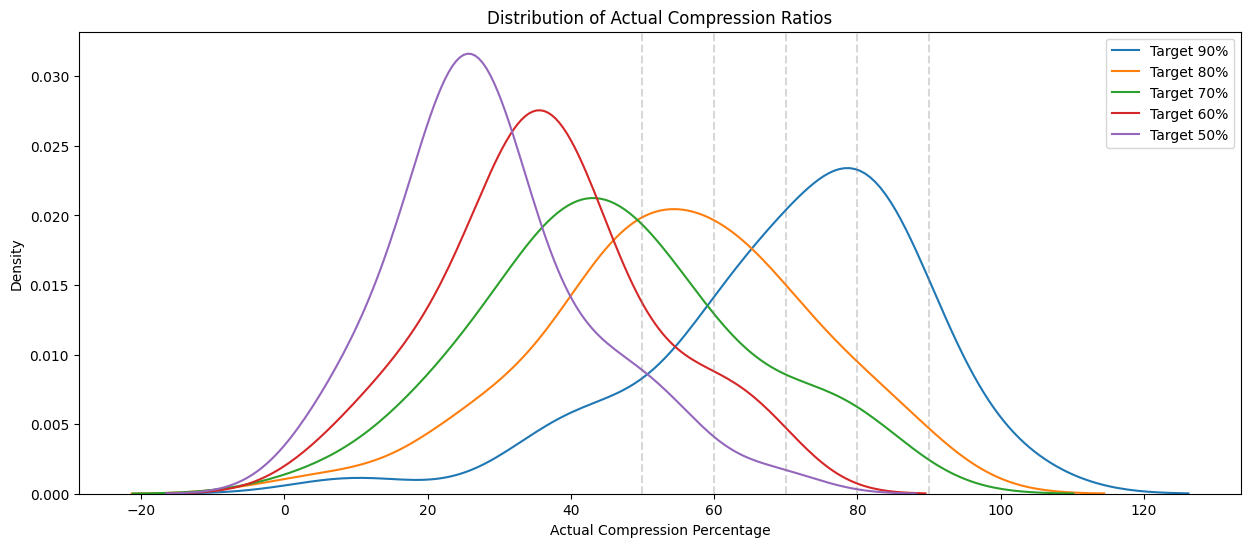

In [4]:
# Load the data
df = load_and_prepare_data('../datasets/gpqa_diamond_compressed.csv')

# Plot distributions
plot_compression_distributions(df)


Compression Accuracy Statistics:
   Target  Mean Actual %    Std Dev  Mean Abs Error  Max Error  Within 5%  \
0      90      70.114388  18.375460       20.861221  80.163934  12.195122   
1      80      54.439801  18.382771       26.486680  75.081967  12.195122   
2      70      45.920752  18.273294       26.100067  65.081967   4.878049   
3      60      36.847332  14.937513       24.106075  55.081967   7.317073   
4      50      29.071932  13.861082       22.411266  46.721311  12.195122   

   Within 10%  
0   36.585366  
1   19.512195  
2   19.512195  
3   19.512195  
4   17.073171  


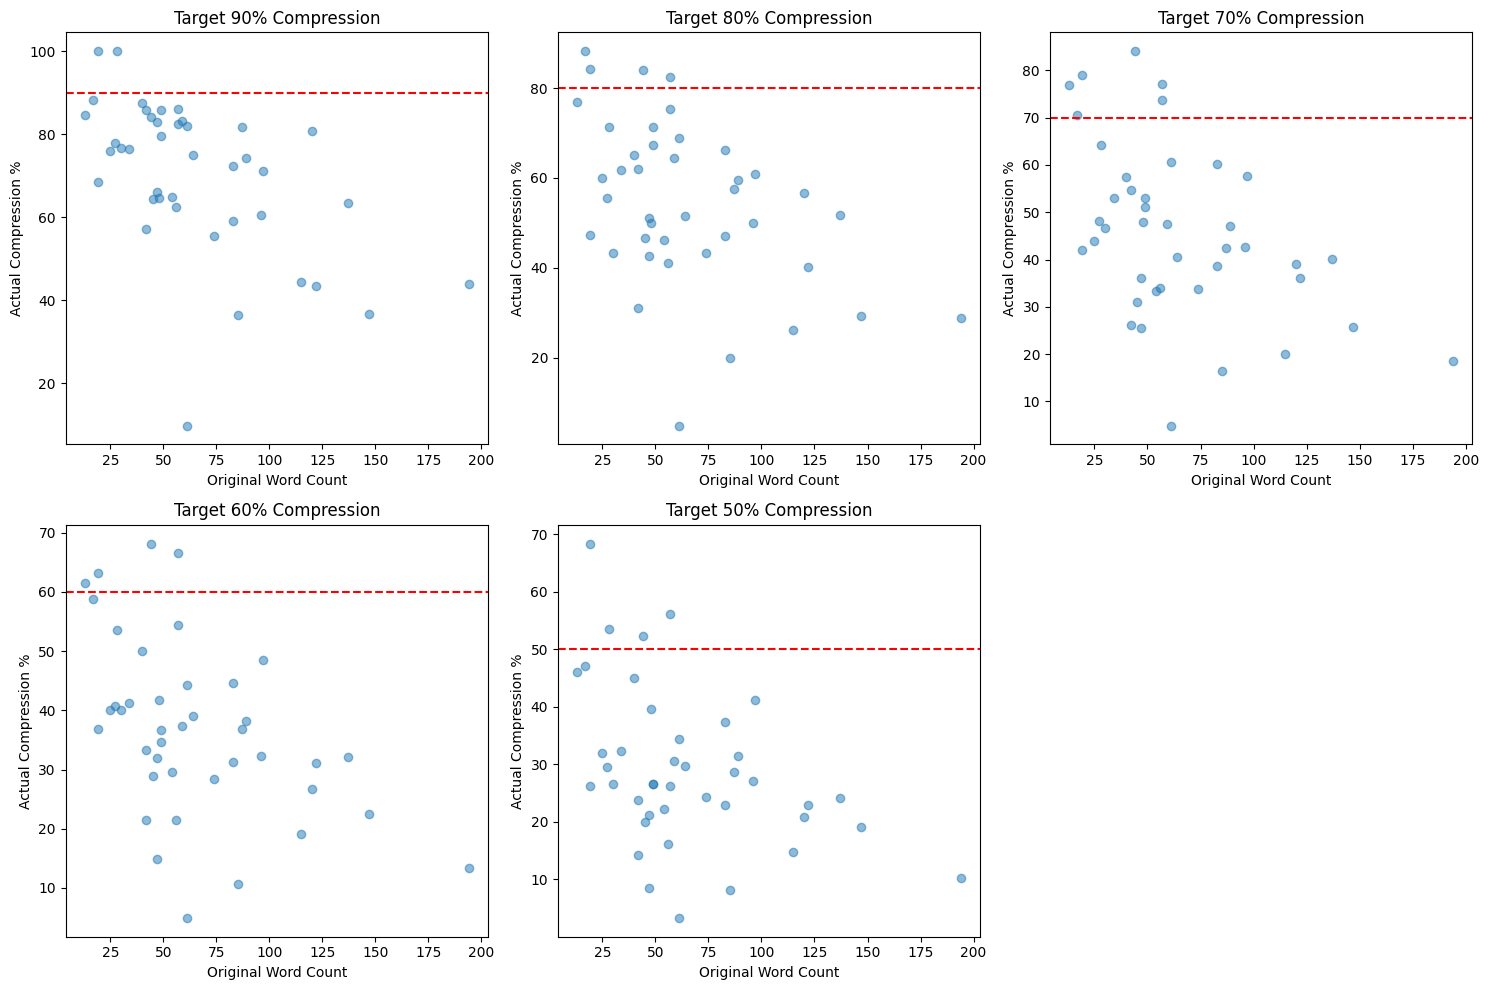


Random Compression Examples:
                                            Original  Original Words  \
0  Calculate the eigenvector of a quantum mechani...             147   
1  A methanol solution of (R)-(+)-Limonene is sti...              87   
2  A common approximation made in many-body nucle...              85   

                                     90% Compression  \
0  Calculate the eigenvector of a quantum mechani...   
1  A methanol solution of (R)-(+)-Limonene is sti...   
2  A common approximation in many-body nuclear ca...   

                                     80% Compression  \
0  Find the eigenvector of a quantum operator $\v...   
1  (R)-(+)-Limonene in MeOH is stirred with Pd/C ...   
2  In many-body nuclear calculations, an "impulse...   

                                     70% Compression  \
0  Find the eigenvector of $\vec{P}$ for a muon i...   
1  Limonene in MeOH + Pd/C + H2 → 1. 1 + 3-chloro...   
2  An "impulse" approximation in nuclear calculat...   

      

In [5]:
# Get accuracy stats
stats = compression_accuracy_stats(df)
print("\nCompression Accuracy Statistics:")
print(stats)

# Plot length correlations
plot_length_correlations(df)

# Show some random examples
examples = sample_compressions(df, n=3)
print("\nRandom Compression Examples:")
print(examples)

# Find best/worst compressions
best_worst = find_best_worst_compressions(df, n=2)
print("\nBest and Worst Compressions:")
for category, examples in best_worst.items():
    print(f"\n{category}:")
    for question, percent in examples:
        print(f"Question: {question}")
        print(f"Actual %: {percent:.1f}")

In [10]:
def display_question_compressions(df: pd.DataFrame, index: int = None) -> None:
    """
    Display a question and all its compressions with detailed metrics.
    
    Args:
        df: The dataframe containing the compressed questions
        index: Optional specific index to display. If None, picks a random question
    """
    if index is None:
        index = np.random.choice(df.index)
    
    row = df.iloc[index]
    
    # Print original question with metrics
    print("="*100)
    print(f"Question #{index}")
    print("="*100)
    print(f"\nORIGINAL ({row['original_word_count']} words, {row['original_char_count']} chars):")
    print("-"*100)
    print(row['Question'])
    print("\nCOMPRESSIONS:")
    print("-"*100)
    
    # Print each compression with its metrics
    for target in [90, 80, 70, 60, 50]:
        compressed = row[f'compression_{target}']
        words = row[f'compression_{target}_word_count']
        chars = row[f'compression_{target}_char_count']
        word_percent = row[f'compression_{target}_word_percent']
        char_percent = row[f'compression_{target}_char_percent']
        
        print(f"\n{target}% TARGET:")
        print(f"Words: {words} ({word_percent:.1f}% of original)")
        print(f"Chars: {chars} ({char_percent:.1f}% of original)")
        print(f"Text: {compressed}")
    
    print("\n" + "="*100)

# Example usage:

# Load the data
df = pd.read_csv('../datasets/gpqa_diamond_compressed.csv')

# Display a random question
display_question_compressions(df)

# Display a specific question (e.g., question #5)
display_question_compressions(df, index=5)

# Display multiple random questions
for _ in range(3):
    display_question_compressions(df)
    print("\n")


Question #15

ORIGINAL (19 words, 334 chars):
----------------------------------------------------------------------------------------------------
How many of the following compounds will exhibit optical activity?

(Z)-1-chloro-2-methylbut-1-ene
(3aR,7aS,E)-8-(chloromethylene)hexahydro-4,7-methanoisobenzofuran-1,3-dione
(2R,3S)-2,3-dimethylsuccinic acid
(2R,3R)-2,3-dimethylsuccinic acid
(R)-cyclohex-3-en-1-ol
(1s,3s,5s)-cyclohexane-1,3,5-triol
1-cyclopentyl-3-methylbutan-1-one

COMPRESSIONS:
----------------------------------------------------------------------------------------------------

90% TARGET:
Words: 19 (100.0% of original)
Chars: 339 (101.5% of original)
Text: How many of the following compounds will exhibit optical activity? (Z)-1-chloro-2-methylbut-1-ene, (3aR,7aS,E)-8-(chloromethylene)hexahydro-4,7-methanoisobenzofuran-1,3-dione, (2R,3S)-2,3-dimethylsuccinic acid, (2R,3R)-2,3-dimethylsuccinic acid, (R)-cyclohex-3-en-1-ol, (1s,3s,5s)-cyclohexane-1,3,5-triol, 1-cyclopentyl-